In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("/kaggle/input/college-student-placement-factors-dataset/college_student_placement_dataset.csv")

In [3]:
data.head()

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,No,8,8,4,No
1,CLG0061,97,5.52,5.37,8,No,7,8,0,No
2,CLG0036,109,5.36,5.83,9,No,3,1,1,No
3,CLG0055,122,5.47,5.75,6,Yes,1,6,1,No
4,CLG0004,96,7.91,7.69,7,No,8,10,2,No


In [4]:
data.shape

(10000, 10)

In [5]:
data.columns

Index(['College_ID', 'IQ', 'Prev_Sem_Result', 'CGPA', 'Academic_Performance',
       'Internship_Experience', 'Extra_Curricular_Score',
       'Communication_Skills', 'Projects_Completed', 'Placement'],
      dtype='object')

In [6]:
data[data.columns[0]] = data[data.columns[0]].apply(lambda x: int(x[3:]))

In [7]:
data.head()

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,30,107,6.61,6.28,8,No,8,8,4,No
1,61,97,5.52,5.37,8,No,7,8,0,No
2,36,109,5.36,5.83,9,No,3,1,1,No
3,55,122,5.47,5.75,6,Yes,1,6,1,No
4,4,96,7.91,7.69,7,No,8,10,2,No


In [8]:
no_yes_dict= {"No":0,"Yes":1}
data[data.columns[5]] = data[data.columns[5]].map(no_yes_dict)
data[data.columns[-1]]= data[data.columns[-1]].map(no_yes_dict)

In [9]:
data.head()

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,30,107,6.61,6.28,8,0,8,8,4,0
1,61,97,5.52,5.37,8,0,7,8,0,0
2,36,109,5.36,5.83,9,0,3,1,1,0
3,55,122,5.47,5.75,6,1,1,6,1,0
4,4,96,7.91,7.69,7,0,8,10,2,0


In [10]:
corr_matrix = data.corr()

In [11]:
corr_matrix

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
College_ID,1.000000,0.002473,-0.004060,-0.003422,-0.015442,0.012037,-0.003931,-0.005194,0.004903,0.002750
IQ,0.002473,1.000000,-0.002640,-0.002859,-0.006827,-0.000247,-0.003458,-0.010896,0.014538,0.285914
Prev_Sem_Result,-0.004060,-0.002640,1.000000,0.980768,-0.005765,-0.013347,0.009326,-0.017269,0.018434,0.317896
CGPA,-0.003422,-0.002859,0.980768,1.000000,-0.002958,-0.012562,0.011441,-0.018242,0.020872,0.321607
Academic_Performance,-0.015442,-0.006827,-0.005765,-0.002958,1.000000,0.025903,0.011774,-0.019733,-0.013148,-0.014920
Internship_Experience,0.012037,-0.000247,-0.013347,-0.012562,0.025903,1.000000,0.002093,-0.020437,-0.010260,-0.005841
Extra_Curricular_Score,-0.003931,-0.003458,0.009326,0.011441,0.011774,0.002093,1.000000,0.003769,0.008122,-0.004740
Communication_Skills,-0.005194,-0.010896,-0.017269,-0.018242,-0.019733,-0.020437,0.003769,1.000000,-0.004486,0.323155
Projects_Completed,0.004903,0.014538,0.018434,0.020872,-0.013148,-0.010260,0.008122,-0.004486,1.000000,0.217499
Placement,0.002750,0.285914,0.317896,0.321607,-0.014920,-0.005841,-0.004740,0.323155,0.217499,1.000000


<Axes: >

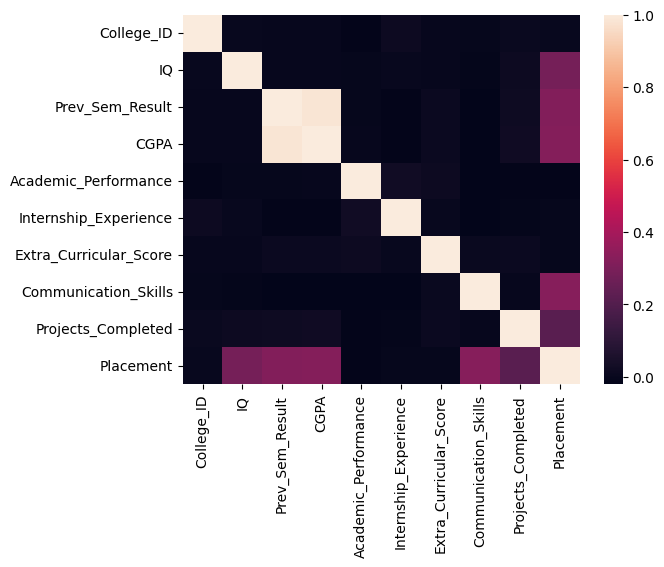

In [12]:
sns.heatmap(corr_matrix)

123789### 

In [13]:
feature_selected_data=data[[data.columns[1],data.columns[2],data.columns[3],data.columns[7],data.columns[8],data.columns[9]]]

In [14]:
feature_selected_data


,IQ,Prev_Sem_Result,CGPA,Communication_Skills,Projects_Completed,Placement
0,107,6.61,6.28,8,4,0
1,97,5.52,5.37,8,0,0
2,109,5.36,5.83,1,1,0
3,122,5.47,5.75,6,1,0
4,96,7.91,7.69,10,2,0
...,...,...,...,...,...,...
9995,119,8.41,8.29,8,0,1
9996,70,9.25,9.34,7,2,0
9997,89,6.08,6.25,9,5,0
9998,107,8.77,8.92,5,1,0


In [15]:
feature_selected_data.head()

,IQ,Prev_Sem_Result,CGPA,Communication_Skills,Projects_Completed,Placement
0,107,6.61,6.28,8,4,0
1,97,5.52,5.37,8,0,0
2,109,5.36,5.83,1,1,0
3,122,5.47,5.75,6,1,0
4,96,7.91,7.69,10,2,0


placement are not input features it is target feature

placement will be y and the five input features will be x

<Axes: >

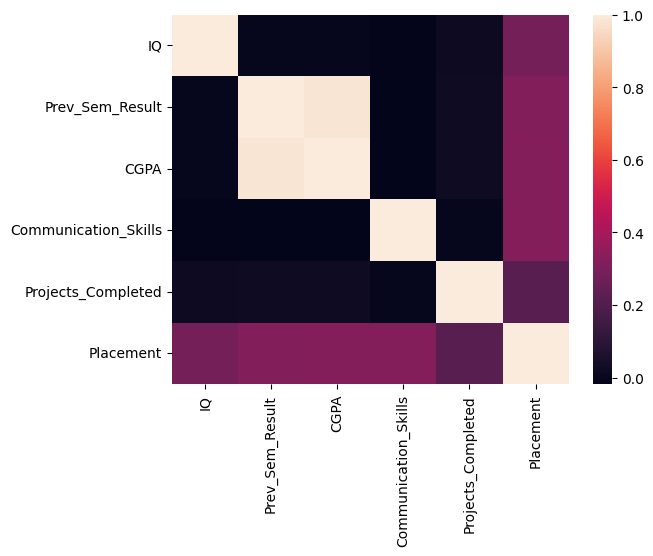

In [16]:
sns.heatmap(feature_selected_data.corr())

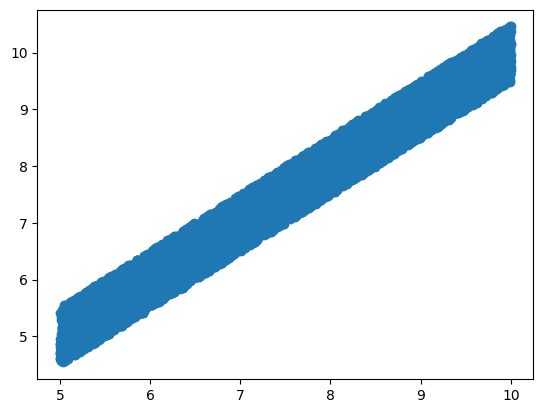

In [17]:
plt.scatter(
    feature_selected_data[feature_selected_data.columns[1]],   # x values
    feature_selected_data[feature_selected_data.columns[2]]    # y values
)


In [18]:
np.linalg.det(feature_selected_data.iloc[:,0:5].cov())

967.3939913725411

In [19]:
placement_equals_1_prior= data[data[data.columns[-1]] == 1].shape[0]/data.shape[0]

In [20]:
placement_equals_1_prior


0.1659

In [21]:
placement_equals_1_data= feature_selected_data[data["Placement"]==1]
placement_equals_1_data

,IQ,Prev_Sem_Result,CGPA,Communication_Skills,Projects_Completed,Placement
6,123,6.68,6.58,8,2,1
7,111,8.77,8.76,1,2,1
18,86,8.20,8.15,9,4,1
20,121,8.41,8.07,3,3,1
23,78,8.67,9.17,10,2,1
...,...,...,...,...,...,...
9964,123,9.93,10.01,4,5,1
9978,84,9.87,9.69,9,4,1
9992,109,9.92,10.09,10,3,1
9994,117,8.71,8.44,4,4,1


(array([  8.,  38., 109., 208., 226., 582., 362., 101.,  22.,   3.]),
 array([ 56. ,  66.2,  76.4,  86.6,  96.8, 107. , 117.2, 127.4, 137.6,
        147.8, 158. ]),
 <BarContainer object of 10 artists>)

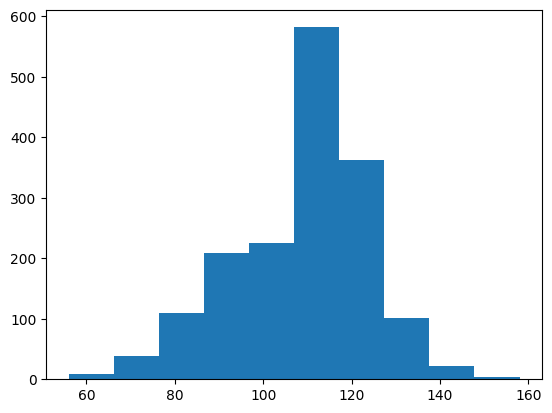

In [22]:
plt.hist(placement_equals_1_data["IQ"])

In [23]:

x = np.array(feature_selected_data.iloc[:,0:-1])
cov_mat = np.cov(x, rowvar = False)
F = np.linalg.svd(cov_mat)

In [24]:
E = F[0]
lamda = F[1]



In [25]:
np.dot(E[:,0],E[:,1])

4.2595875507287843e-19

In [26]:
lamda

array([2.26597565e+02, 8.41678439e+00, 4.21673530e+00, 2.94002762e+00,
       4.09142123e-02])

In [27]:
new_X = np.matmul(x,F[0])

In [28]:
new_cov_mat = np.cov(new_X,rowvar= False)

In [29]:
new_cov_mat.shape

(5, 5)

In [30]:
new_features = pd.DataFrame(data= new_X, columns=["Input_Feat_" +str(i+1) for i in range (new_X.shape[1])])

both are the ways to name our coulmns

In [31]:
new_features = pd.DataFrame(data= new_X, columns=["Input_Feat_1","Input_Feat_2","Input_Feat_3","Input_Feat_4","Input_Feat_5"])

In [32]:
new_features

,Input_Feat_1,Input_Feat_2,Input_Feat_3,Input_Feat_4,Input_Feat_5
0,-106.985375,-7.981836,-9.555150,3.340004,-0.306328
1,-96.979236,-8.012939,-7.923885,-0.560073,-0.162169
2,-108.996045,-1.031525,-8.018326,0.386976,0.270885
3,-121.985085,-6.057694,-8.170966,0.378047,0.138325
4,-95.976963,-9.916990,-11.407312,1.263163,-0.240179
...,...,...,...,...,...
9995,-118.977579,-7.956445,-12.032431,-0.820737,-0.172895
9996,-69.982793,-6.807540,-13.433592,1.183742,-0.039127
9997,-88.985088,-8.947921,-9.236363,4.393741,0.048864
9998,-106.985575,-4.909174,-12.706018,0.151579,0.009777


<Axes: >

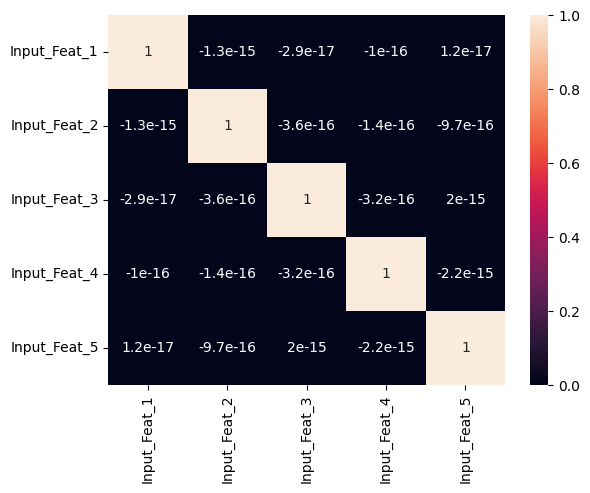

In [33]:
sns.heatmap(new_features.corr(),annot= True)

In [34]:
new_data =pd.concat([new_features,feature_selected_data[data.columns[-1]]],axis=1)

In [35]:
new_data

,Input_Feat_1,Input_Feat_2,Input_Feat_3,Input_Feat_4,Input_Feat_5,Placement
0,-106.985375,-7.981836,-9.555150,3.340004,-0.306328,0
1,-96.979236,-8.012939,-7.923885,-0.560073,-0.162169,0
2,-108.996045,-1.031525,-8.018326,0.386976,0.270885,0
3,-121.985085,-6.057694,-8.170966,0.378047,0.138325,0
4,-95.976963,-9.916990,-11.407312,1.263163,-0.240179,0
...,...,...,...,...,...,...
9995,-118.977579,-7.956445,-12.032431,-0.820737,-0.172895,1
9996,-69.982793,-6.807540,-13.433592,1.183742,-0.039127,0
9997,-88.985088,-8.947921,-9.236363,4.393741,0.048864,0
9998,-106.985575,-4.909174,-12.706018,0.151579,0.009777,0


(array([  3.,  22., 101., 362., 572., 236., 208., 109.,  38.,   8.]),
 array([-157.98374855, -147.7834374 , -137.58312626, -127.38281511,
        -117.18250397, -106.98219282,  -96.78188168,  -86.58157053,
         -76.38125939,  -66.18094824,  -55.98063709]),
 <BarContainer object of 10 artists>)

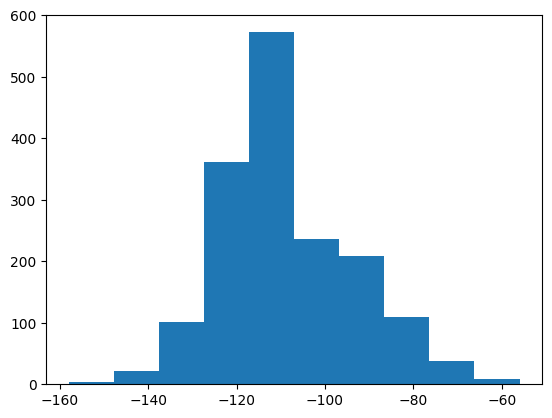

In [36]:
plt.hist(new_data[new_data[new_data.columns[-1]] == 1][new_data.columns[0]])


log x, e power x, x power n , chain rule in derivative

compute the joint probability of observing all the values in the data   ..      
P( input_feature= -122.981852 intersection input_feature= -110.996007 intersection ...... intersection -118.977579; mean(),std_deviation())

step 2: we are going to assume that all the values in the data are I.I.D (INDEPENDENT AND IDENTICALLY DISTRIBUTED) ...  ...
P(input_feature1 =